In [1]:
require 'hdf5'

local result = hdf5.open('path/to/saved/output/testOutput_1.h5','r')
prediction = result:read('prediction'):all()

db = torch.load('mnist_segmentation.t7')
data = db.test.data
labels = db.test.labels

In [2]:
local mathfuncs = dofile('../utils/mathfuncs.lua')
local prediction_ = prediction:ge(0.5)
local labels_ = labels:ge(0.5)
local iu, acc = 0, 0
for i = 1,prediction:size(2) do
    local _pred = prediction_[{{},{i},{},{}}]
    local _lab = labels_[{{},{i},{},{}}]
    local tp = torch.cmul(_pred, _lab):float():sum()
    local fp_np = _pred:ne(_lab):float():sum()
    iu = iu + tp / (tp + fp_np)
    acc = acc + tp / _pred:float():sum()
end
iu = iu / prediction:size(2)
acc = acc / prediction:size(2)
print('mean IU: ' .. iu)
print('mean Acc: ' .. acc)

mean IU: 0.81912783593051	
mean Acc: 0.91111215135516	


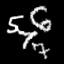

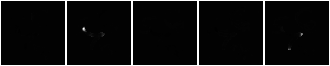

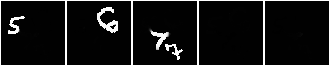

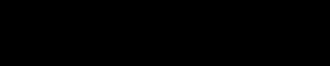

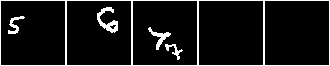

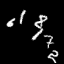

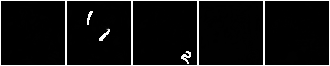

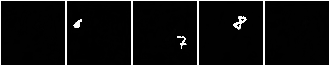

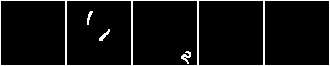

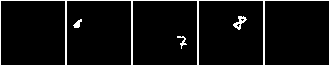

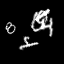

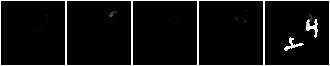

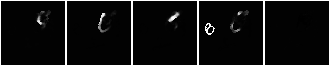

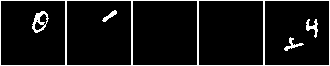

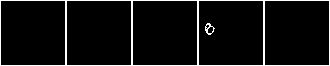

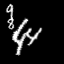

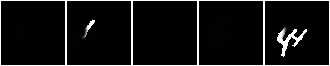

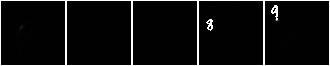

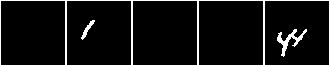

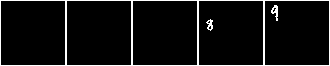

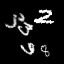

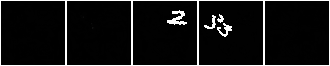

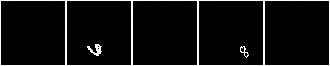

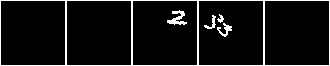

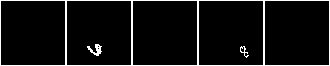

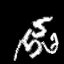

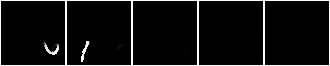

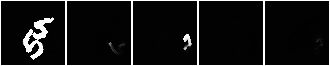

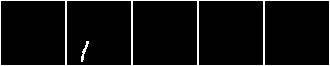

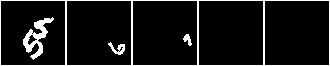

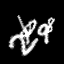

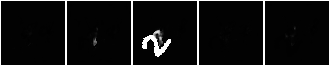

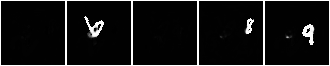

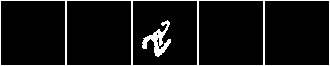

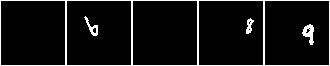

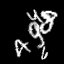

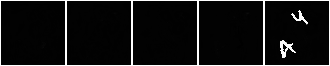

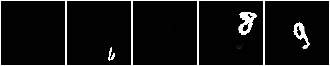

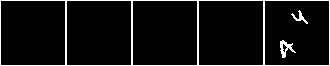

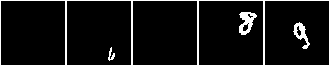

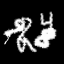

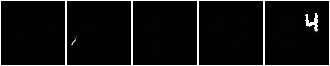

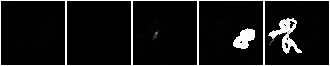

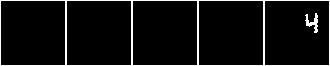

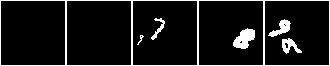

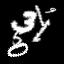

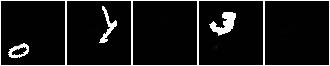

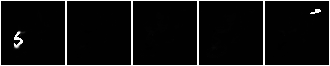

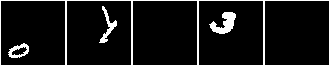

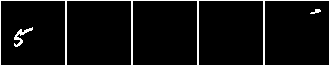

In [4]:
for i = 1,10 do
    itorch.image(data[i])
    local tb = {}
    for j = 1,prediction:size(2) do
        tb[#tb+1] = prediction[{{i},{j},{},{}}]
        if #tb == 5 then
            itorch.image(tb)
            tb = {}
        end
    end
    
    for j = 1,labels:size(2) do
        tb[#tb+1] = labels[{{i},{j},{},{}}]
        if #tb == 5 then
            itorch.image(tb)
            tb = {}
        end
    end 
end